# Histogram & Distplot
(참고) https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0 <br>

### **목적** 
seabron에 distplot 을 활용하던 중 히스토그램과 밀도분포의 차이점과 이때 y축 값이 의미하는바를 명확하게 하고자 함

1. 히스토그램은 y축이 카운트이지만, density plot에서의 y축은 확률이 아니라 밀도확률(probability density)이다.<br>
(probability density is the probability per unit on the x-axis) <br>

2. 따라서 density-plot에서의 y축은 1보다 클 수 있다. <br>
3. density-plot에서 y축은 서로 다른 카테고리 간에 상대적인 비교값 정도로 볼 수 있다. <br>
=> x축은 두 그래프 모두 같은 의미


In [12]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')
import scipy as sp

In [13]:
# warning 무시
import warnings
warnings.filterwarnings(action='ignore')

### data-set

In [4]:
set2 = pd.read_csv('./ABtest-set2.csv')

In [5]:
variant_target = ['2inhJAml', 'DloRdaZ3', 'Ywlwn6xf', 'nY5IppFT', 'qTnkdYxH']

In [7]:
set2_variant=set2[(set2['abtest.variant'].isin(['2inhJAml', 'DloRdaZ3', 'OorVmHga', 'Ywlwn6xf', 'nY5IppFT', 'qTnkdYxH']))]

In [8]:
set2_variant_target=set2_variant[set2_variant['abtest.variant'].isin(variant_target)]

In [9]:
set2_clicksum=set2_variant_target[['abtest.variant','abtest.visit_type','abtest.visits','abtest.hubtab','abtest.newsbox','abtest.search_issue','abtest.hotissue','abtest.favorite_site']]
set2_clicksum['sum']= set2_clicksum['abtest.hubtab']+set2_clicksum['abtest.newsbox']+set2_clicksum['abtest.search_issue']+set2_clicksum['abtest.hotissue']

/opt/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
set2_nonzero=set2_clicksum[set2_clicksum['sum']!=0]

### both histogram and density-plot

(0, 100)

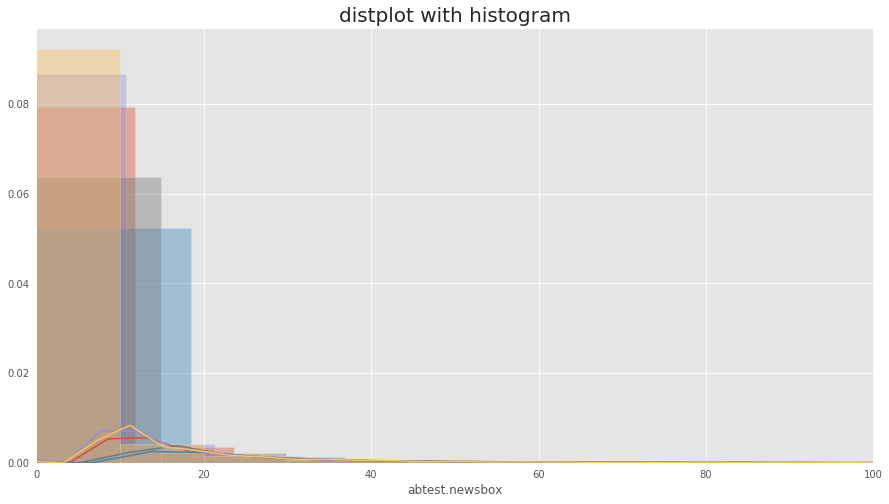

In [20]:
fig = plt.gcf()
fig.set_size_inches(15,8)
sns.distplot(set2_nonzero[set2_nonzero['abtest.variant']==variant_target[0]]['abtest.newsbox'],  label=variant_target[0])
sns.distplot(set2_nonzero[set2_nonzero['abtest.variant']==variant_target[1]]['abtest.newsbox'],  label=variant_target[1])
sns.distplot(set2_nonzero[set2_nonzero['abtest.variant']==variant_target[2]]['abtest.newsbox'],  label=variant_target[2])
sns.distplot(set2_nonzero[set2_nonzero['abtest.variant']==variant_target[3]]['abtest.newsbox'],  label=variant_target[3])
sns.distplot(set2_nonzero[set2_nonzero['abtest.variant']==variant_target[4]]['abtest.newsbox'], label=variant_target[4])
plt.title('distplot with histogram', size=20)
plt.xlim(0,100)

### Only density-plot 
분포의 차이가 더 분명하게 보임

(0, 100)

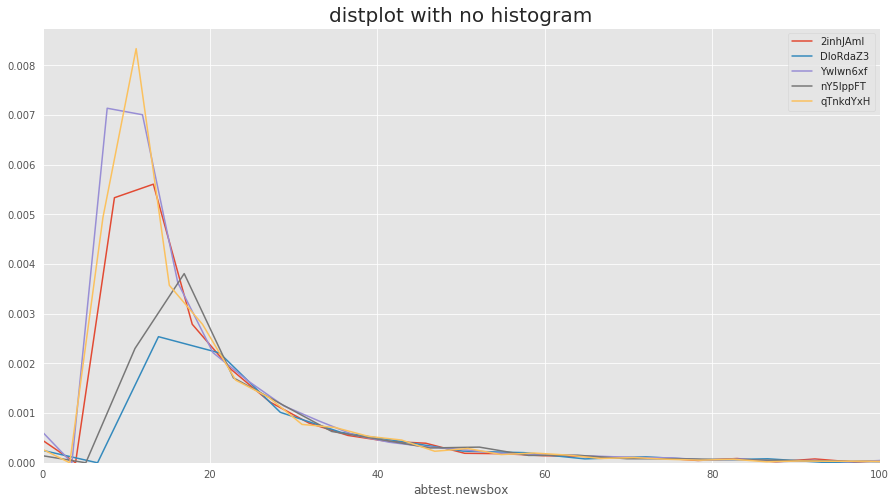

In [18]:
fig = plt.gcf()
fig.set_size_inches(15,8)
sns.distplot(set2_nonzero[set2_nonzero['abtest.variant']==variant_target[0]]['abtest.newsbox'], hist=False, label=variant_target[0])
sns.distplot(set2_nonzero[set2_nonzero['abtest.variant']==variant_target[1]]['abtest.newsbox'], hist=False, label=variant_target[1])
sns.distplot(set2_nonzero[set2_nonzero['abtest.variant']==variant_target[2]]['abtest.newsbox'], hist=False, label=variant_target[2])
sns.distplot(set2_nonzero[set2_nonzero['abtest.variant']==variant_target[3]]['abtest.newsbox'], hist=False, label=variant_target[3])
sns.distplot(set2_nonzero[set2_nonzero['abtest.variant']==variant_target[4]]['abtest.newsbox'], hist=False,label=variant_target[4])
plt.title('distplot with no histogram', size=20)
plt.xlim(0,100)

### About histogram and Density-plot

### y축 의미
* 히스토그램에서 y축 -> 상대도수
    * 계급의 상대도수 = (계급의 도수) / (도수의 총합)
* 밀도분포그래프에서 y축 -> 구간도수
    * 구간도수 = (계급의 도수)/(계급의 크기)
        * ex) 계급구간이 10이하, 10초과 20이하, 20초과 30이하 있을 때 계급의 크기는 10


(0, 20)

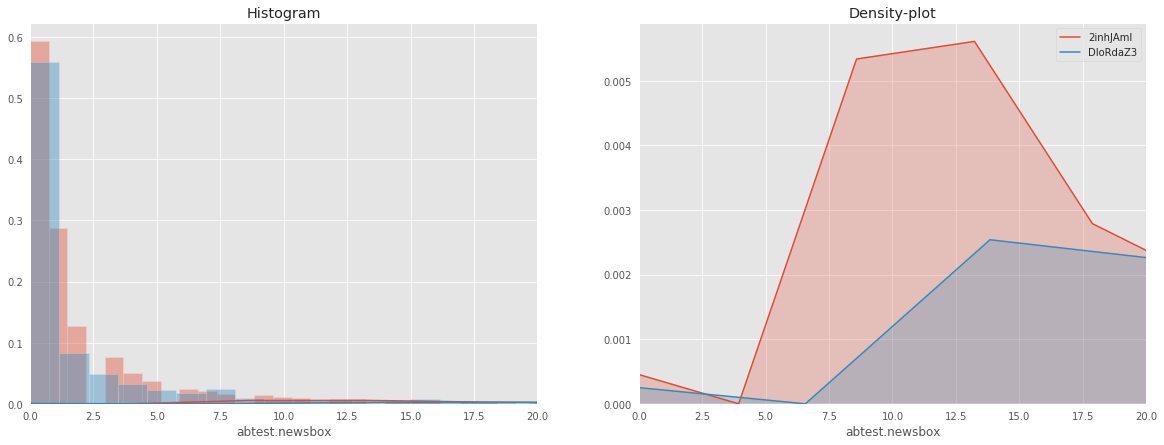

In [14]:
# newsbox data
## 아래 두개는 같은 데이터를 가지고 하나는 histogram,하나는 density-plot으로 그린 것
f, ax = plt.subplots(1,2, figsize=(20,7))
sns.distplot(set2_nonzero[set2_nonzero['abtest.variant']==variant_target[0]]['abtest.newsbox'], bins=800, label=variant_target[0], ax=ax[0])
sns.distplot(set2_nonzero[set2_nonzero['abtest.variant']==variant_target[1]]['abtest.newsbox'], bins=800,  label=variant_target[1], ax=ax[0])
sns.distplot(set2_nonzero[set2_nonzero['abtest.variant']==variant_target[0]]['abtest.newsbox'],hist=False,kde_kws={'shade':True}, label=variant_target[0], ax=ax[1])
sns.distplot(set2_nonzero[set2_nonzero['abtest.variant']==variant_target[1]]['abtest.newsbox'], hist=False,kde_kws={'shade':True},label=variant_target[1], ax=ax[1])
ax[0].set_title('Histogram')
ax[1].set_title('Density-plot')
ax[0].set_xlim([0,20])
ax[1].set_xlim([0,20])

* hist=False 를 추가하면 히스토그램을 제외한 밀도분포만 확인할 수 있음
* kde_kws={'shade':True} 를 통해 아래 면적을 채울 수 있어서 분포에 겹치는 부분과 다른부분을 명확히 알 수 있음